In [1]:
from pathlib import Path

import torch
import seaborn as sns
import matplotlib.pyplot as plt

from ballchallenge.accelerometer_dataset import AccelerometerDataset

DATASET_ROOT = Path("../data")
SAMPLING_FREQ = 400

In [2]:
dataset = AccelerometerDataset(DATASET_ROOT, grid_size=(10, 10))
samples, labels = dataset[:]

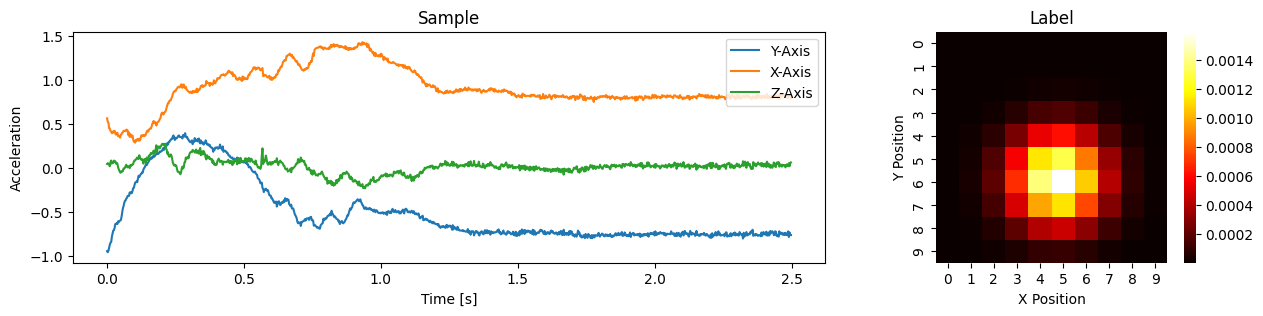

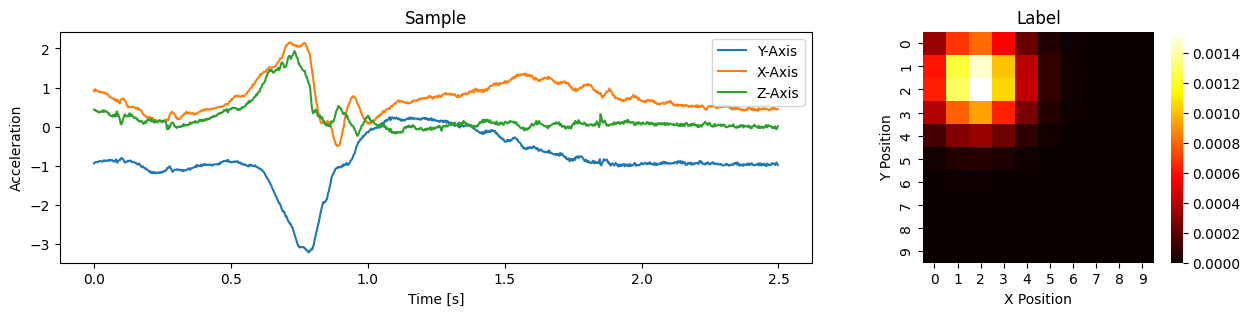

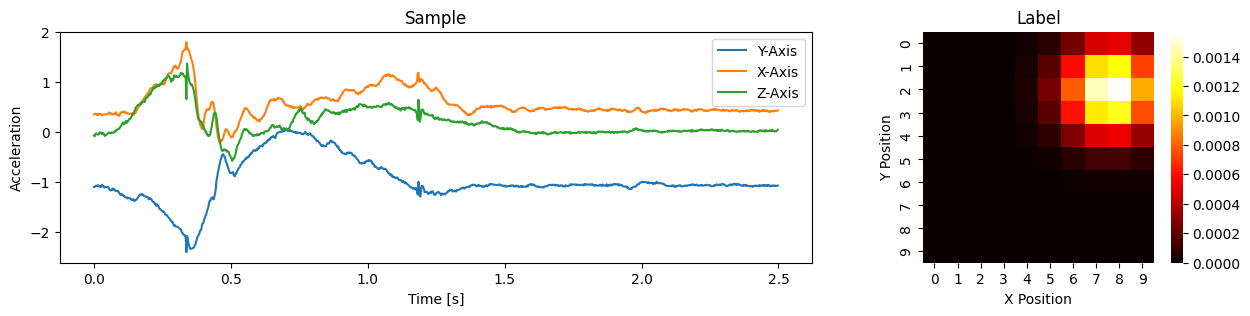

In [3]:
def plot_sample_with_label(idx: int) -> None:
    def plot_sample(ax):
        seconds = torch.arange(samples.shape[2]) / SAMPLING_FREQ
        ax.plot(seconds, samples[idx, 1], label="Y-Axis")
        ax.plot(seconds, samples[idx, 0], label="X-Axis")
        ax.plot(seconds, samples[idx, 2], label="Z-Axis")
        ax.legend(loc="upper right")
        ax.set_xlabel("Time [s]")
        ax.set_ylabel("Acceleration")
        ax.set_title("Sample")

    def plot_label(ax):
        sns.heatmap(labels[idx], square=True, cmap="hot", ax=ax)
        ax.set_xlabel("X Position")
        ax.set_ylabel("Y Position")
        ax.set_title("Label")

    _, axs = plt.subplot_mosaic([["sample", "sample", "label"]], figsize=(15, 3))
    plot_sample(axs["sample"])
    plot_label(axs["label"])

for i in [0, 14, 30]:
    plot_sample_with_label(i)